### Importing Libraries

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
# Reading csv file
telecom_data = pd.read_csv('telecom_churn_data.csv')

In [3]:
# Displaying sample data
telecom_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [4]:
# Dimensions of dataset
telecom_data.shape

(99999, 226)

In [5]:
# Create a copy of original data
churn_telecom_data = telecom_data.copy()

In [6]:
# Create a list of all columns from original data
columns = telecom_data.columns.tolist()

We assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. We define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, we discard all data corresponding to this phase.

In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

### High Value Customer

High-value customers are as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [7]:
recharge_columns = [i for i in columns if 'rech' in i]
recharge_columns

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [8]:
# Even though we are having total amount of recharge for talktime, we don't have similar number for data, instead we have average and number of recharges
# Let us calculate that amount
churn_telecom_data['total_data_rech_amt_6'] = churn_telecom_data['av_rech_amt_data_6'] * churn_telecom_data['total_rech_data_6']
churn_telecom_data['total_data_rech_amt_7'] = churn_telecom_data['av_rech_amt_data_7'] * churn_telecom_data['total_rech_data_7']
churn_telecom_data['total_data_rech_amt_8'] = churn_telecom_data['av_rech_amt_data_8'] * churn_telecom_data['total_rech_data_8']
churn_telecom_data['total_data_rech_amt_9'] = churn_telecom_data['av_rech_amt_data_9'] * churn_telecom_data['total_rech_data_9']

In [9]:
# Dropping the columns that are already accounted for
churn_telecom_data.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6',
              'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], axis=1, inplace=True)

In [10]:
# Finding average recharge amount for good phase (i.e., 6th and 7th month)
good_phase_recharge_amount = (churn_telecom_data['total_rech_amt_6'].fillna(0) + churn_telecom_data['total_rech_amt_7'].fillna(0) + 
                             churn_telecom_data['total_data_rech_amt_6'].fillna(0) + churn_telecom_data['total_data_rech_amt_7'].fillna(0))/2

In [11]:
# 70th percentile of good phase average recharge amount
good_phase_recharge_amount_70 = np.percentile(good_phase_recharge_amount, 70.0)
print(f'70th Percentile of recharge amount is : {good_phase_recharge_amount_70}')

70th Percentile of recharge amount is : 478.0


In [12]:
# Keep high value customer data
churn_telecom_data = churn_telecom_data[good_phase_recharge_amount >= good_phase_recharge_amount_70]

print(f'Shape of high value customer data: {churn_telecom_data.shape}')

Shape of high value customer data: (30001, 222)


### Tagging Churn

The churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [13]:
# Separating all columns for 9th month
month9_cols = [i for i in columns if '9' in i]

In [14]:
# Separating ic columns
month9_ic_cols = [i for i in month9_cols if 'ic' in i and 'mou' in i]

In [15]:
# Separating oc columns
month9_og_cols = [i for i in month9_cols if 'og' in i and 'mou' in i]

In [16]:
# Separating vol columns
month9_vol_cols = [i for i in month9_cols if 'vol' in i and 'mb' in i]

In [17]:
# Sum of all ic columns
churn_telecom_data['ic_sum'] = telecom_data[month9_ic_cols].sum(axis=1)

# Sum of all og columns
churn_telecom_data['og_sum'] = telecom_data[month9_og_cols].sum(axis=1)

# Sum of all vol columns
churn_telecom_data['vol_sum'] = telecom_data[month9_vol_cols].sum(axis=1)

In [18]:
churn_tagged_cols = ['ic_sum', 'og_sum', 'vol_sum']

# Create churn as the sum of newly aggregated columns, as that will be 0 if all the columns are having 0 value
churn_telecom_data['churn'] = churn_telecom_data[churn_tagged_cols].sum(axis=1)

churn_telecom_data.head(15)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   
33     7000149764        109             0.0             0.0             0.0   
38     7000815202        109             0.0             0.0             0.0   
41     7000721289        109             0.0             0.0             0.0   
48     7000294396        109             0.0             0.0             0.0   
53     7002188521        109             0.0             0.0             0.0   
56     7002180748        109             0.0             0.0             0.0   
57     7001682585        109             0.0             0.0             0.0   
61     7000152517        109             0.0             0.0             0.0   
67     7000800341        109             0.0             0.0             0.0   
69     7002393996        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   
33            6/30/2014            7/31/2014            8/31/2014   
38            6/30/2014            7/31/2014            8/31/2014   
41            6/30/2014            7/31/2014            8/31/2014   
48            6/30/2014            7/31/2014            8/31/2014   
53            6/30/2014            7/31/2014            8/31/2014   
56            6/30/2014            7/31/2014            8/31/2014   
57            6/30/2014            7/31/2014            8/31/2014   
61            6/30/2014            7/31/2014            8/31/2014   
67            6/30/2014            7/31/2014            8/31/2014   
69            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6  ...  jun_vbc_3g  sep_vbc_3g  \
0             9/30/2014   197.385  ...      101.20        3.58   
7             9/30/2014  1069.180  ...       18.74        0.00   
8             9/30/2014   378.721  ...      122.16        0.00   
21            9/30/2014   514.453  ...        0.00        0.00   
23            9/30/2014    74.350  ...        0.00        0.00   
33            9/30/2014   977.020  ...     1714.67        0.00   
38            9/30/2014   363.987  ...        0.00        0.00   
41            9/30/2014   482.832  ...        0.00        0.00   
48            9/30/2014  1873.271  ...        0.00        0.00   
53            9/30/2014   978.077  ...        0.00        0.00   
56            9/30/2014   452.624  ...     1459.45        0.00   
57            9/30/2014  1201.298  ...     1892.32        0.00   
61            9/30/2014   565.516  ...        0.00        0.00   
67                  NaN   218.818  ...     1010.15        0.00   
69            9/30/2014   809.518  ...        0.00        0.00   

    total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  \
0                   252.0                  252.0                  252.0   
7                     NaN                    NaN                    NaN   
8                     NaN                  354.0                  207.0   
21                    NaN                    NaN                    NaN   
23                    NaN                  712.0                  540.0   
33                 5285.0                20424.0                  455.0   
38                    NaN           

In [19]:
# If churn value > 0, that means user used a service indicating an active user
churn_telecom_data['churn'] = churn_telecom_data['churn'].apply(lambda x:0 if x > 0 else 1)
churn_telecom_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6  ...  jun_vbc_3g  sep_vbc_3g  \
0             9/30/2014   197.385  ...      101.20        3.58   
7             9/30/2014  1069.180  ...       18.74        0.00   
8             9/30/2014   378.721  ...      122.16        0.00   
21            9/30/2014   514.453  ...        0.00        0.00   
23            9/30/2014    74.350  ...        0.00        0.00   

    total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  \
0                   252.0                  252.0                  252.0   
7                     NaN                    NaN                    NaN   
8                     NaN                  354.0                  207.0   
21                    NaN                    NaN                    NaN   
23                    NaN                  712.0                  540.0   

    total_data_rech_amt_9  ic_sum   og_sum  vol_sum  churn  
0                     NaN    0.00     0.00     0.00      1  
7                     NaN    0.00     0.00     0.00      1  
8                     NaN  104.72   426.52     0.00      0  
21                    NaN  757.80  3094.55     0.00      0  
23                  252.0  382.42   376.58   328.67      0  

[5 rows x 226 columns]

In [20]:
churn_telecom_data.churn.value_counts(normalize=True)

0    0.945302
1    0.054698
Name: churn, dtype: float64

In [21]:
# Drop 9th month columns
churn_telecom_data.drop([i for i in month9_cols + churn_tagged_cols if i not in ['total_rech_data_9', 'av_rech_amt_data_9']],
                  axis=1, inplace=True)
churn_telecom_data.shape

(30001, 171)

### Data Cleaning & EDA

In [22]:
# Checking for missing values
missing_values = round(churn_telecom_data.isna().sum() / len(churn_telecom_data) * 100, 2).sort_values(ascending=False)
missing_values

total_data_rech_amt_9    49.27
arpu_3g_8                46.83
total_data_rech_amt_8    46.83
fb_user_8                46.83
max_rech_data_8          46.83
                         ...  
vol_2g_mb_6               0.00
vol_2g_mb_7               0.00
vol_2g_mb_8               0.00
vol_3g_mb_6               0.00
churn                     0.00
Length: 171, dtype: float64

In [23]:
# Selecting columns with more than 40% missing values
drop_missing_cols = missing_values[missing_values > 40].index.tolist()
drop_missing_cols

['total_data_rech_amt_9',
 'arpu_3g_8',
 'total_data_rech_amt_8',
 'fb_user_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'night_pck_user_8',
 'date_of_last_rech_data_8',
 'arpu_2g_8',
 'arpu_3g_6',
 'max_rech_data_6',
 'total_data_rech_amt_6',
 'night_pck_user_6',
 'fb_user_6',
 'count_rech_3g_6',
 'date_of_last_rech_data_6',
 'count_rech_2g_6',
 'arpu_2g_6',
 'date_of_last_rech_data_7',
 'total_data_rech_amt_7',
 'max_rech_data_7',
 'arpu_3g_7',
 'count_rech_2g_7',
 'arpu_2g_7',
 'count_rech_3g_7',
 'night_pck_user_7',
 'fb_user_7']

In [24]:
# Dropping columns where more than 40% of values are missing
churn_telecom_data.drop(drop_missing_cols, axis=1, inplace=True)
churn_telecom_data.shape

(30001, 143)

In [25]:
# Rechecking missing values
round(churn_telecom_data.isna().sum() / len(churn_telecom_data) * 100, 2).sort_values(ascending=False)

loc_ic_mou_8          3.91
og_others_8           3.91
loc_og_t2f_mou_8      3.91
loc_ic_t2t_mou_8      3.91
spl_og_mou_8          3.91
                      ... 
max_rech_amt_6        0.00
max_rech_amt_7        0.00
max_rech_amt_8        0.00
last_day_rch_amt_6    0.00
churn                 0.00
Length: 143, dtype: float64

Since remaining columns in the dataset have less than 5% of missing data, we can drop the rows with the missing values

In [26]:
# Dropping rows with missing values less than 5%
for i in churn_telecom_data.columns:
    churn_telecom_data = churn_telecom_data[~ churn_telecom_data[i].isna()]

In [27]:
# Rechecking missing values
round(churn_telecom_data.isna().sum() / len(churn_telecom_data) * 100, 2).sort_values(ascending=False)

mobile_number       0.0
isd_ic_mou_6        0.0
total_ic_mou_6      0.0
total_ic_mou_7      0.0
total_ic_mou_8      0.0
                   ... 
std_og_t2c_mou_7    0.0
std_og_t2c_mou_8    0.0
std_og_mou_6        0.0
std_og_mou_7        0.0
churn               0.0
Length: 143, dtype: float64

In [28]:
# The date columns don't have any added value except for marking the last day of the month so we will drop them
date_cols = [i for i in churn_telecom_data.columns if 'date' in i]
churn_telecom_data.drop(date_cols, axis=1, inplace=True)

In [29]:
# Rechecking if date columns have been removed
[i for i in churn_telecom_data.columns if 'date' in i]

[]

In [30]:
churn_telecom_data.shape

(28163, 137)

In [31]:
churn_telecom_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   
33     7000149764        109             0.0             0.0             0.0   

      arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  ...  monthly_3g_8  \
7   1069.180  1349.850  3171.480        57.84        54.68  ...             0   
8    378.721   492.223   137.362       413.69       351.03  ...             0   
21   514.453   597.753   637.760       102.41       132.11  ...             0   
23    74.350   193.897   366.966        48.96        50.66  ...             1   
33   977.020  2362.833   409.230         0.00         0.00  ...             1   

    sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  aug_vbc_3g  jul_vbc_3g  \
7             0            0            0   802       57.74       19.38   
8             0            0            0   315       21.03      910.65   
21            0            0            0   720        0.00        0.00   
23            0            0            1   604       40.45       51.86   
33            1            3            0  1328      358.10     2706.83   

    jun_vbc_3g  sep_vbc_3g  churn  
7        18.74         0.0      1  
8       122.16         0.0      0  
21        0.00         0.0      0  
23        0.00         0.0      0  
33     1714.67         0.0      0  

[5 rows x 137 columns]

If we go through the dataset, we can see few columns with only one value such as circle_id.
These columns won't be having any variance and hence won't be contributing anything to our target variable

In [32]:
# Checking columns for only 1 unique value
cols_single_value = []

for i in churn_telecom_data.columns:
    if churn_telecom_data[f'{i}'].nunique() == 1:
        cols_single_value.append(i)
        
cols_single_value

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [33]:
# Dropping single value columns
churn_telecom_data.drop(cols_single_value, axis=1, inplace=True)
churn_telecom_data.shape

(28163, 127)

In [34]:
# Drop 'mobile number' column as it doesn't add any info
churn_telecom_data.drop('mobile_number', axis=1, inplace=True)
churn_telecom_data.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   
33   977.020  2362.833   409.230         0.00         0.00         0.00   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
7         453.43        567.16        325.91          16.23  ...   
8          94.66         80.63        136.48           0.00  ...   
21        757.93        896.68        983.39           0.00  ...   
23         85.41         89.36        205.89           0.00  ...   
33          0.00          0.00          0.00           0.00  ...   

    monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  aug_vbc_3g  \
7              0            0            0            0   802       57.74   
8              0            0            0            0   315       21.03   
21             0            0            0            0   720        0.00   
23             1            0            0            1   604       40.45   
33             1            1            3            0  1328      358.10   

    jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  churn  
7        19.38       18.74         0.0      1  
8       910.65      122.16         0.0      0  
21        0.00        0.00         0.0      0  
23       51.86        0.00         0.0      0  
33     2706.83     1714.67         0.0      0  

[5 rows x 126 columns]

Now let's check the correlation between the features. If we find any feature with high
correlation, we will go ahead and drop them

In [35]:
corr = churn_telecom_data.corr()
corr.loc[:,:] = np.tril(corr,-1)
corr = corr.stack()

high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7       arpu_6         0.728704
arpu_8       arpu_6         0.671437
             arpu_7         0.778413
onnet_mou_7  onnet_mou_6    0.770224
onnet_mou_8  onnet_mou_6    0.646114
                              ...   
aug_vbc_3g   vol_3g_mb_8    0.620313
jul_vbc_3g   vol_3g_mb_7    0.651025
             aug_vbc_3g     0.706559
jun_vbc_3g   vol_3g_mb_6    0.662497
             jul_vbc_3g     0.680020
Length: 207, dtype: float64

In [36]:
# List of columns that are having high correlation and explained well by other columns
corr_cols = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
                 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7',
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']

In [37]:
# Dropping high correlation columns
churn_telecom_data.drop(corr_cols, axis=1, inplace=True)
churn_telecom_data.shape

(28163, 87)

In [38]:
churn_telecom_data.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   
33   977.020  2362.833   409.230         0.00         0.00         0.00   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
7         453.43        567.16        325.91          16.23  ...   
8          94.66         80.63        136.48           0.00  ...   
21        757.93        896.68        983.39           0.00  ...   
23         85.41         89.36        205.89           0.00  ...   
33          0.00          0.00          0.00           0.00  ...   

    monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  aug_vbc_3g  \
7              0            0            0            0   802       57.74   
8              0            0            0            0   315       21.03   
21             0            0            0            0   720        0.00   
23             1            0            0            1   604       40.45   
33             1            1            3            0  1328      358.10   

    jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  churn  
7        19.38       18.74         0.0      1  
8       910.65      122.16         0.0      0  
21        0.00        0.00         0.0      0  
23       51.86        0.00         0.0      0  
33     2706.83     1714.67         0.0      0  

[5 rows x 87 columns]

### Driving new features

In [39]:
# Create total mou instead of offnet and onnet

churn_telecom_data['total_mou_6'] = churn_telecom_data['onnet_mou_6'] + churn_telecom_data['offnet_mou_6']
churn_telecom_data['total_mou_7'] = churn_telecom_data['onnet_mou_7'] + churn_telecom_data['offnet_mou_7']
churn_telecom_data['total_mou_8'] = churn_telecom_data['onnet_mou_8'] + churn_telecom_data['offnet_mou_8']

In [40]:
# Dropping redundant columns
churn_telecom_data.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)
churn_telecom_data.head()

arpu_6    arpu_7    arpu_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7   1069.180  1349.850  3171.480          16.23          33.49          31.64   
8    378.721   492.223   137.362           0.00           0.00           0.00   
21   514.453   597.753   637.760           0.00           0.00           0.00   
23    74.350   193.897   366.966           0.00           0.00           0.00   
33   977.020  2362.833   409.230           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2c_mou_6  ...  \
7           23.74          12.59          38.06               0.0  ...   
8            0.00           0.00           0.00               0.0  ...   
21           0.00           0.00           0.00               0.0  ...   
23           0.00           0.00           0.00               0.0  ...   
33           0.00           0.00           0.00               0.0  ...   

    sachet_3g_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  churn  \
7             0   802       57.74       19.38       18.74         0.0      1   
8             0   315       21.03      910.65      122.16         0.0      0   
21            0   720        0.00        0.00        0.00         0.0      0   
23            1   604       40.45       51.86        0.00         0.0      0   
33            0  1328      358.10     2706.83     1714.67         0.0      0   

    total_mou_6  total_mou_7  total_mou_8  
7        511.27       621.84       378.20  
8        508.35       431.66       171.56  
21       860.34      1028.79      1068.53  
23       134.37       140.02       239.47  
33         0.00         0.00         0.00  

[5 rows x 84 columns]

It can be noticed that rest of the columns are deatiled breakdown of totals, therefore we wil lnot merge
them into one, instead we will create new features such that each will account for
good phase by averaging out the values for 6th and 7th month

In [41]:
# Creating separate column for 6th and 7th month
column_for_6_7 = [i[:-2] for i in churn_telecom_data.columns if '6' in i or '7' in i]

In [42]:
# Create new feature and drop redundant columns
for i in set(column_for_6_7):
    churn_telecom_data[f'good_phase_{i}'] = (churn_telecom_data[f'{i}_6'] + churn_telecom_data[f'{i}_7']) / 2
    churn_telecom_data.drop([f'{i}_6', f'{i}_7'], axis=1, inplace=True)

In [43]:
churn_telecom_data.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
7   3171.480          31.64          38.06              0.00        255.79   
8    137.362           0.00           0.00              7.15         63.04   
21   637.760           0.00           0.00              0.00        129.74   
23   366.966           0.00           0.00             17.71        182.14   
33   409.230           0.00           0.00              0.56          0.00   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
7              16.68         77.84         10.01          6.50          0.0   
8               0.00         98.28          0.00         10.23          0.0   
21              0.00        938.79          0.00          0.00          0.0   
23              0.00         39.61          0.00         17.71          0.0   
33              0.00          0.00          0.00          0.56          0.0   

    ...  good_phase_std_ic_mou  good_phase_roam_og_mou  good_phase_isd_ic_mou  \
7   ...                176.810                  18.165                  8.295   
8   ...                 13.545                   0.000                  0.000   
21  ...                 62.985                   0.000                  0.000   
23  ...                  8.915                   0.000                 14.115   
33  ...                  4.420                   0.000                  0.000   

    good_phase_sachet_3g  good_phase_vol_2g_mb  good_phase_og_others  \
7                    0.0                 0.000                   0.0   
8                    0.0               178.000                   0.0   
21                   0.0                 0.000                   0.0   
23                   0.0                 0.240                   0.0   
33                   2.0                72.405                   0.0   

    good_phase_total_mou  good_phase_std_og_mou  good_phase_sachet_2g  \
7                566.555                 68.000                   0.0   
8                470.005                136.870                   0.5   
21               944.565                848.990                   0.0   
23               137.195                  4.355                   0.0   
33                 0.000                  0.000                   0.0   

    good_phase_max_rech_amt  
7                    1185.0  
8                     122.0  
21                     50.0  
23                     89.5  
33                    753.5  

[5 rows x 58 columns]

vbc columns doesn't have month suffix so it seemed to have missed out
let's average out the columns for this feature too

In [44]:
# Create new column
churn_telecom_data['good_phase_vbc_3g'] = (churn_telecom_data['jul_vbc_3g'] + churn_telecom_data['jun_vbc_3g']) / 2

In [45]:
# Drop redundant columns
churn_telecom_data.drop(['jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], axis=1, inplace=True)

In [46]:
# Rename August column from vbc to vbc_3g_8
churn_telecom_data['vbc_3g_8'] = churn_telecom_data['aug_vbc_3g']
churn_telecom_data.drop('aug_vbc_3g', axis=1, inplace=True)

In [47]:
churn_telecom_data.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
7   3171.480          31.64          38.06              0.00        255.79   
8    137.362           0.00           0.00              7.15         63.04   
21   637.760           0.00           0.00              0.00        129.74   
23   366.966           0.00           0.00             17.71        182.14   
33   409.230           0.00           0.00              0.56          0.00   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
7              16.68         77.84         10.01          6.50          0.0   
8               0.00         98.28          0.00         10.23          0.0   
21              0.00        938.79          0.00          0.00          0.0   
23              0.00         39.61          0.00         17.71          0.0   
33              0.00          0.00          0.00          0.56          0.0   

    ...  good_phase_isd_ic_mou  good_phase_sachet_3g  good_phase_vol_2g_mb  \
7   ...                  8.295                   0.0                 0.000   
8   ...                  0.000                   0.0               178.000   
21  ...                  0.000                   0.0                 0.000   
23  ...                 14.115                   0.0                 0.240   
33  ...                  0.000                   2.0                72.405   

    good_phase_og_others  good_phase_total_mou  good_phase_std_og_mou  \
7                    0.0               566.555                 68.000   
8                    0.0               470.005                136.870   
21                   0.0               944.565                848.990   
23                   0.0               137.195                  4.355   
33                   0.0                 0.000                  0.000   

    good_phase_sachet_2g  good_phase_max_rech_amt  good_phase_vbc_3g  vbc_3g_8  
7                    0.0                   1185.0             19.060     57.74  
8                    0.5                    122.0            516.405     21.03  
21                   0.0                     50.0              0.000      0.00  
23                   0.0                     89.5             25.930     40.45  
33                   0.0                    753.5           2210.750    358.10  

[5 rows x 56 columns]

In [48]:
churn_telecom_data.shape

(28163, 56)

In [49]:
# Resetting index
churn_telecom_data.reset_index(inplace=True, drop=True)
churn_telecom_data.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0  3171.480          31.64          38.06              0.00        255.79   
1   137.362           0.00           0.00              7.15         63.04   
2   637.760           0.00           0.00              0.00        129.74   
3   366.966           0.00           0.00             17.71        182.14   
4   409.230           0.00           0.00              0.56          0.00   

   std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
0             16.68         77.84         10.01          6.50          0.0   
1              0.00         98.28          0.00         10.23          0.0   
2              0.00        938.79          0.00          0.00          0.0   
3              0.00         39.61          0.00         17.71          0.0   
4              0.00          0.00          0.00          0.56          0.0   

   ...  good_phase_isd_ic_mou  good_phase_sachet_3g  good_phase_vol_2g_mb  \
0  ...                  8.295                   0.0                 0.000   
1  ...                  0.000                   0.0               178.000   
2  ...                  0.000                   0.0                 0.000   
3  ...                 14.115                   0.0                 0.240   
4  ...                  0.000                   2.0                72.405   

   good_phase_og_others  good_phase_total_mou  good_phase_std_og_mou  \
0                   0.0               566.555                 68.000   
1                   0.0               470.005                136.870   
2                   0.0               944.565                848.990   
3                   0.0               137.195                  4.355   
4                   0.0                 0.000                  0.000   

   good_phase_sachet_2g  good_phase_max_rech_amt  good_phase_vbc_3g  vbc_3g_8  
0                   0.0                   1185.0             19.060     57.74  
1                   0.5                    122.0            516.405     21.03  
2                   0.0                     50.0              0.000      0.00  
3                   0.0                     89.5             25.930     40.45  
4                   0.0                    753.5           2210.750    358.10  

[5 rows x 56 columns]

In [50]:
churn_telecom_data.describe().T

count         mean         std       min  \
arpu_8                       28163.0   528.992500  500.479643 -345.1290   
roam_ic_mou_8                28163.0    13.145865   76.125433    0.0000   
roam_og_mou_8                28163.0    20.926258  107.722393    0.0000   
loc_og_t2c_mou_8             28163.0     1.789363    7.390599    0.0000   
loc_og_mou_8                 28163.0   247.845569  367.353912    0.0000   
std_og_t2f_mou_8             28163.0     1.646062   11.126142    0.0000   
std_og_mou_8                 28163.0   322.121339  615.275135    0.0000   
isd_og_mou_8                 28163.0     1.989213   45.888765    0.0000   
spl_og_mou_8                 28163.0     6.889342   20.813297    0.0000   
og_others_8                  28163.0     0.061151    3.421503    0.0000   
loc_ic_mou_8                 28163.0   235.639315  313.175366    0.0000   
std_ic_t2t_mou_8             28163.0    14.625113   73.017056    0.0000   
std_ic_t2f_mou_8             28163.0     2.692254   20.476161    0.0000   
std_ic_mou_8                 28163.0    46.761176  142.430462    0.0000   
spl_ic_mou_8                 28163.0     0.027889    0.113430    0.0000   
isd_ic_mou_8                 28163.0    11.437856   72.276371    0.0000   
ic_others_8                  28163.0     1.291328   13.164084    0.0000   
total_rech_num_8             28163.0    10.435323    9.288002    1.0000   
max_rech_amt_8               28163.0   164.597131  169.014286    0.0000   
last_day_rch_amt_8           28163.0    94.779640  141.789453    0.0000   
vol_2g_mb_8                  28163.0   109.831129  317.809110    0.0000   
monthly_2g_8                 28163.0     0.160210    0.413067    0.0000   
sachet_2g_8                  28163.0     1.100771    2.573361    0.0000   
monthly_3g_8                 28163.0     0.209459    0.619138    0.0000   
sachet_3g_8                  28163.0     0.208287    1.116503    0.0000   
aon                          28163.0  1233.456627  962.975074  180.0000   
churn                        28163.0     0.028229    0.165628    0.0000   
total_mou_8                  28163.0   597.378280  706.447419    0.0000   
good_phase_monthly_3g        28163.0     0.213773    0.565446    0.0000   
good_phase_spl_ic_mou        28163.0     0.041413    0.154356    0.0000   
good_phase_ic_others         28163.0     1.371220   14.081974    0.0000   
good_phase_loc_ic_mou        28163.0   241.031533  303.003271    0.0000   
good_phase_loc_og_t2c_mou    28163.0     1.766261    6.536779    0.0000   
good_phase_last_day_rch_amt  28163.0    98.522885  108.064480    0.0000   
good_phase_spl_og_mou        28163.0     6.610121   17.610173    0.0000   
good_phase_monthly_2g        28163.0     0.183397    0.392058    0.0000   
good_phase_total_rech_num    28163.0    12.026489    8.650631    1.0000   
good_phase_std_ic_t2t_mou    28163.0    15.535415   76.790814    0.0000   
good_phase_arpu              28163.0   567.163074  431.807280 -451.7135   
good_phase_roam_ic_mou       28163.0    14.632102   66.404361    0.0000   
good_phase_loc_og_mou        28163.0   263.016895  361.575126    0.0000   
good_phase_isd_og_mou        28163.0     2.047679   45.536401    0.0000   
good_phase_std_ic_t2f_mou    28163.0     2.835280   18.312495    0.0000   
good_phase_std_og_t2f_mou    28163.0     1.840391   11.647474    0.0000   
good_phase_std_ic_mou        28163.0    49.261396  135.463961    0.0000   
good_phase_roam_og_mou       28163.0    23.757457   94.459260    0.0000   
good_phase_isd_ic_mou        28163.0    11.458002   74.792010    0.0000   
good_phase_sachet_3g         28163.0     0.217200    0.940707    0.0000   
good_phase_vol_2g_mb         28163.0   127.717157  304.044111    0.0000   
good_phase_og_others         28163.0     0.359434    2.533710    0.0000   
good_phase_total_mou         28163.0   656.094111  657.870003    0.0000   
good_phase_std_og_mou        28163.0   362.567597  586.639498    0.0000   
good_phase_sachet_2g         28163.0     1.154618    2.4

**Observation**
- We can see almost all the columns has some outliers, while most of them are because
there are 0.0 as the service was not used and some are actual outliers
- Since we don't have actual business people to check the accuracy of the data, we will
cap those features

In [51]:
# Going through the output of describe, we can filter the features that needs attention

# List of features to be analyzed
columns_boxplot = ['arpu_8', 'loc_og_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'total_mou_8',
               'good_phase_loc_ic_mou', 'good_phase_last_day_rch_amt', 'good_phase_std_og_mou', 'good_phase_max_rech_amt',
              'good_phase_loc_og_mou', 'good_phase_arpu']

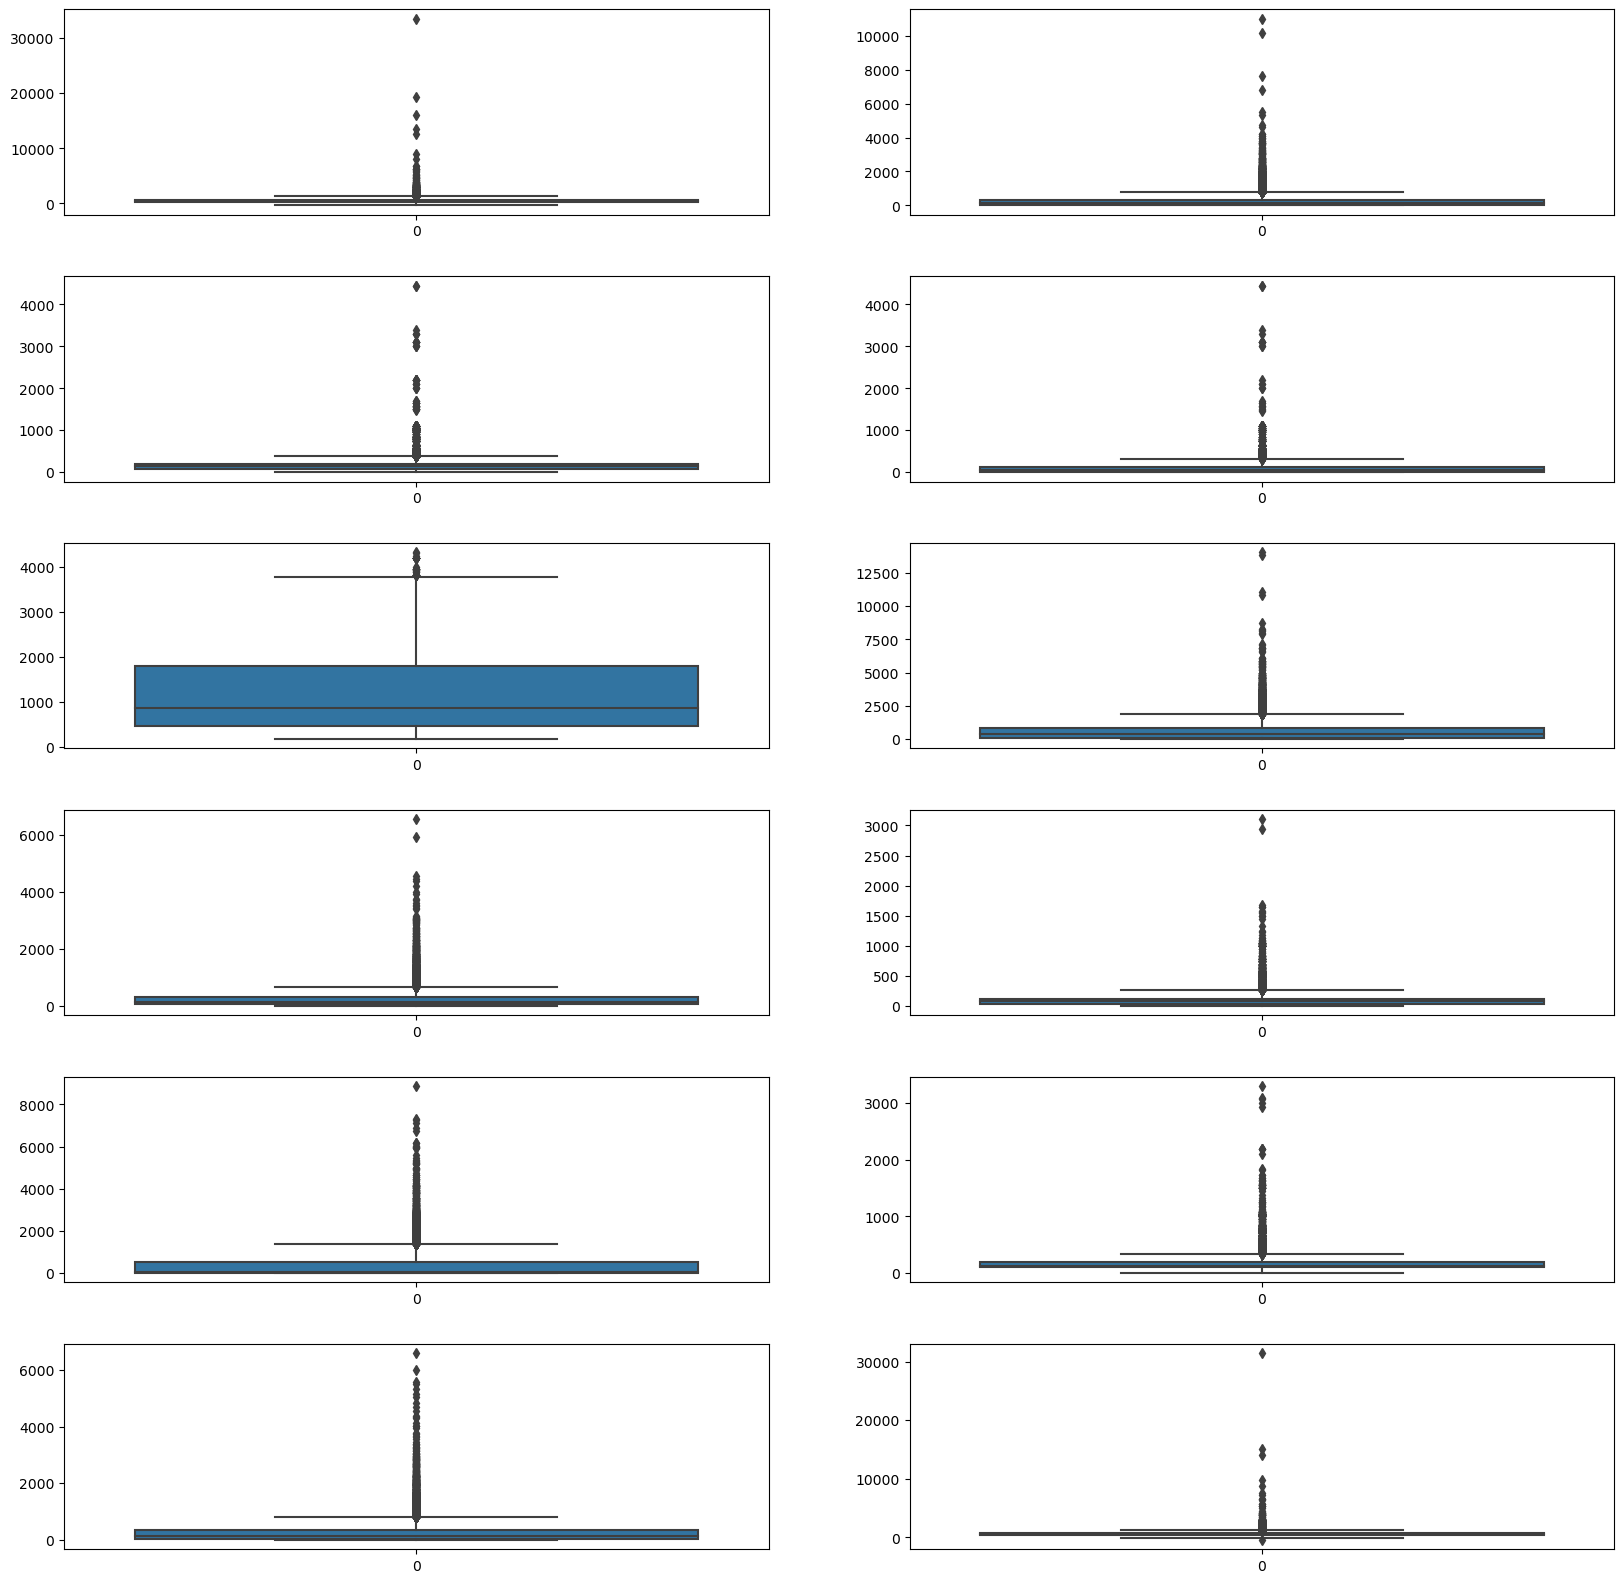

In [52]:
# Plot boxplot for each feature
fig, axis = plt.subplots(6, 2, figsize=(20,20))

for index, col in enumerate(columns_boxplot):
    i, j = divmod(index,2)
    sns.boxplot(churn_telecom_data[col], ax=axis[i, j])

plt.subplots_adjust(hspace=0.3)
plt.show()

**Observations**

- From the above plots, we can define following upper limits to the suspected variables

| Feature | Value | 
| --- | --- | 
| arpu_8 | 7000| 
| loc_og_mou_8 | 4000| 
| max_rech_amt_8 | 1000 | 
| last_day_rch_amt_8 | 1000 | 
| aon | 3000 | 
| total_mou_8 | 4000 | 
| good_phase_loc_ic_mou | 3000 | 
| good_phase_last_day_rch_amt | 1000 | 
| good_phase_std_og_mou | 4000 | 
| good_phase_max_rech_amt | 1500 | 
| good_phase_loc_og_mou | 3000 | 
| good_phase_arpu | 7000 |

- We will make these changes post exploration of other features

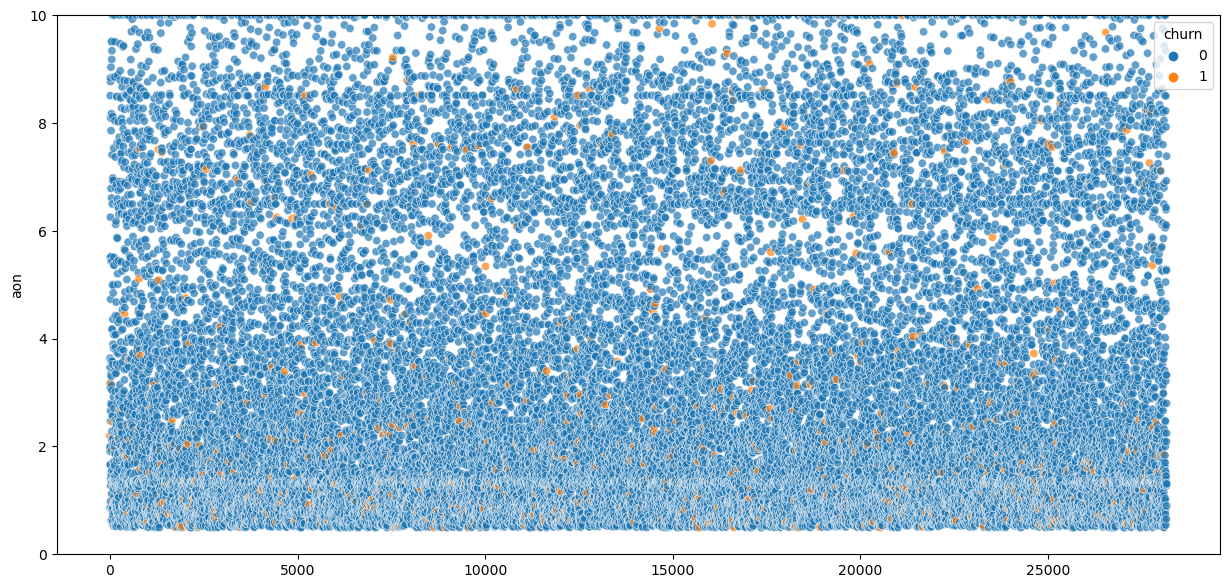

In [53]:
# Check churn based on tenure

plt.figure(figsize=(15,7))
sns.scatterplot(y=churn_telecom_data['aon'] / 365, x=churn_telecom_data.index, hue=churn_telecom_data.churn, alpha=0.7)
plt.ylim(0,10)
plt.show()

**Observation**

- Though pattern is not clear but it can be noticed that majority of churners
had a tenure of less than 4 years

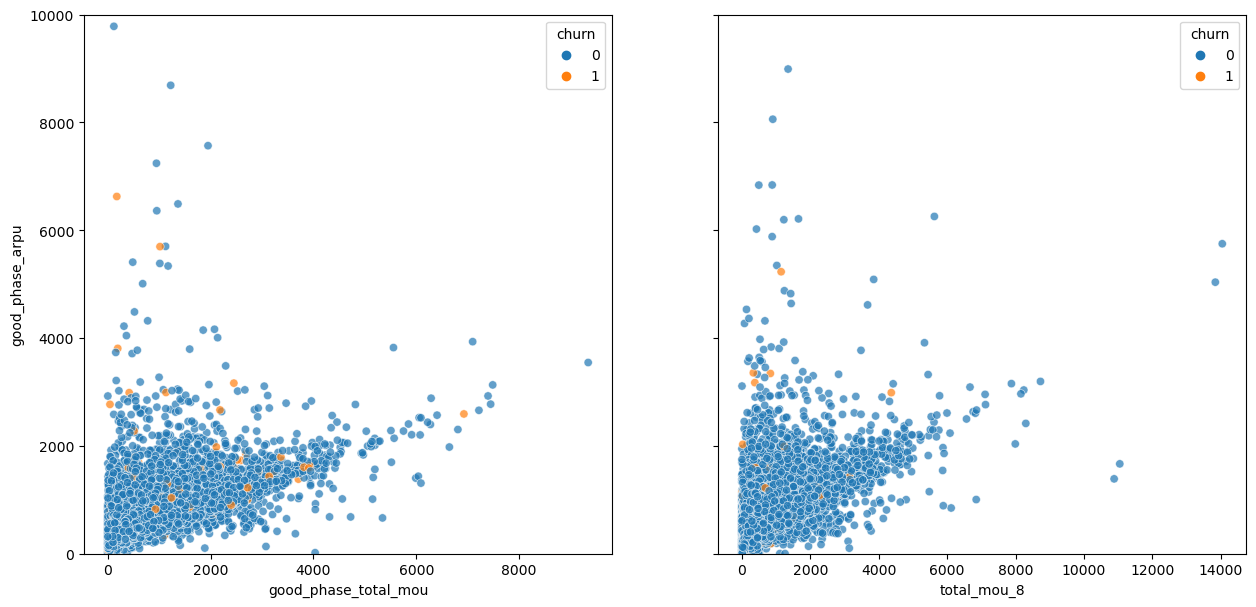

In [54]:
# Let's check how VBC affects the revenue
fig, axes = plt.subplots(1,2, sharey=True, figsize=(15,7))
sns.scatterplot(y='good_phase_arpu', x='good_phase_total_mou', data=churn_telecom_data, ax=axes[0], hue='churn', alpha=0.7)
sns.scatterplot(y='arpu_8', x='total_mou_8', data=churn_telecom_data, ax=axes[1], hue='churn', alpha=0.7)

# limit graph to more general upper bound
plt.ylim(0,10000)
plt.show()

**Observation**

- It is clearly evident that MOU has dropped significantly for the churners in the
action phase (8th month) thus dropping the revenue generated from them
- It is interesting to note that MOU is between 0-2000 which means that revenue is highest
in that region which implies that these users has used other services that were boosting the revenue

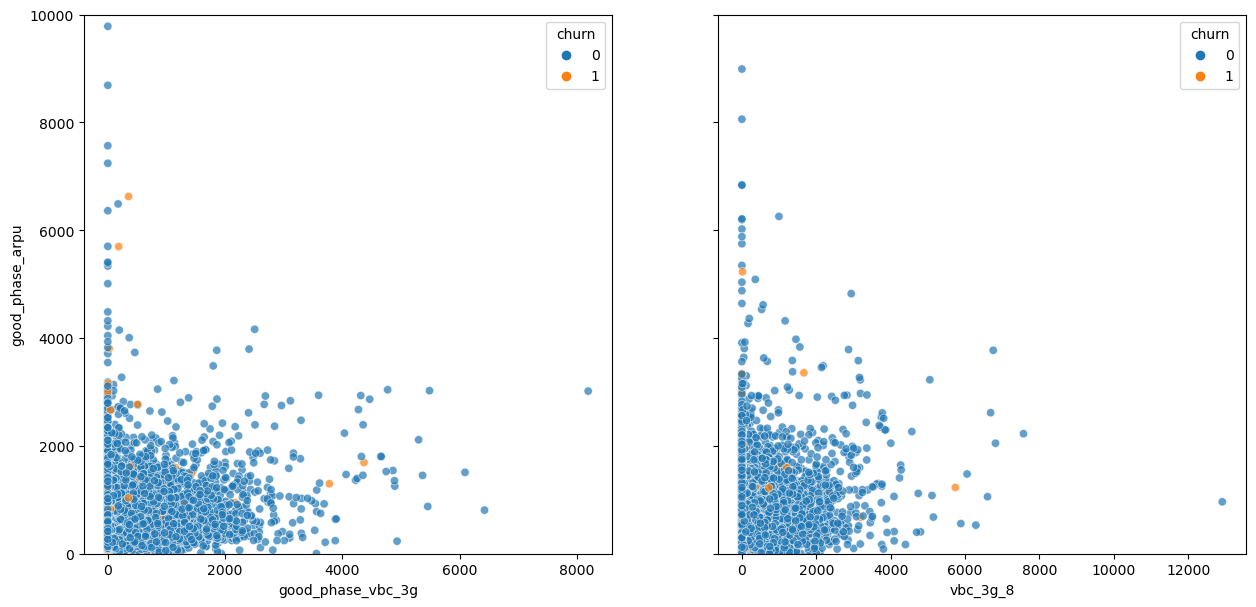

In [55]:
# Let's check how total_mou affects the revenue
fig, axes = plt.subplots(1,2, sharey=True, figsize=(15,7))
sns.scatterplot(y='good_phase_arpu', x='good_phase_vbc_3g', data=churn_telecom_data, ax=axes[0], hue='churn', alpha=0.7)
sns.scatterplot(y='arpu_8', x='vbc_3g_8', data=churn_telecom_data, ax=axes[1], hue='churn', alpha=0.7)


# Limiting the graph to more general upper bound
plt.ylim(0,10000)
plt.show()

**Observation**

- We can see that users who were using very less amount of VBC data and still
generating high revenue, Churned
- Yet again we see that revenue is higher towards lesser consumption side

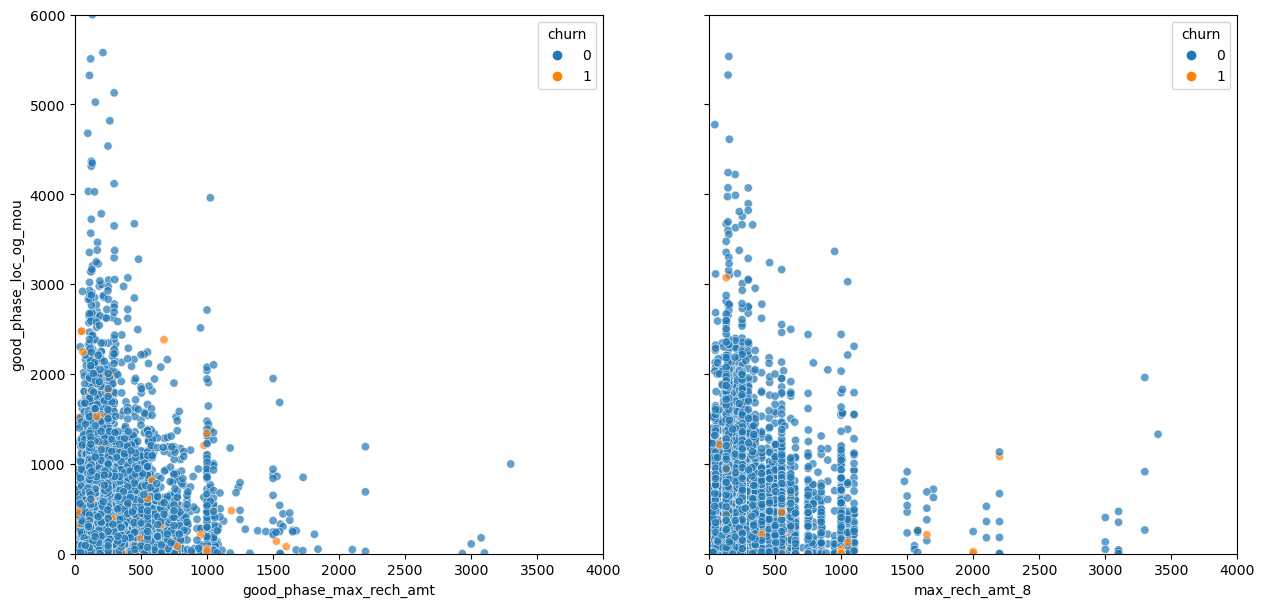

In [56]:
# Lets check the relation between recharge amount and local outgoing calls

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='good_phase_max_rech_amt', y='good_phase_loc_og_mou', data=churn_telecom_data, ax=axes[0],
                hue='churn', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='loc_og_mou_8', data=churn_telecom_data, ax=axes[1], hue='churn', alpha=0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,4000)
axes[1].set_xlim(0,4000)
plt.ylim(0,6000)

plt.show()

**Observations**

- Users who were recharging with high amount were using the service for local use
lesser as compared to the ones who did less amount of recharge
- People whose max recharge amount as well as local outgoing usage was very less
even in good phase, churned more

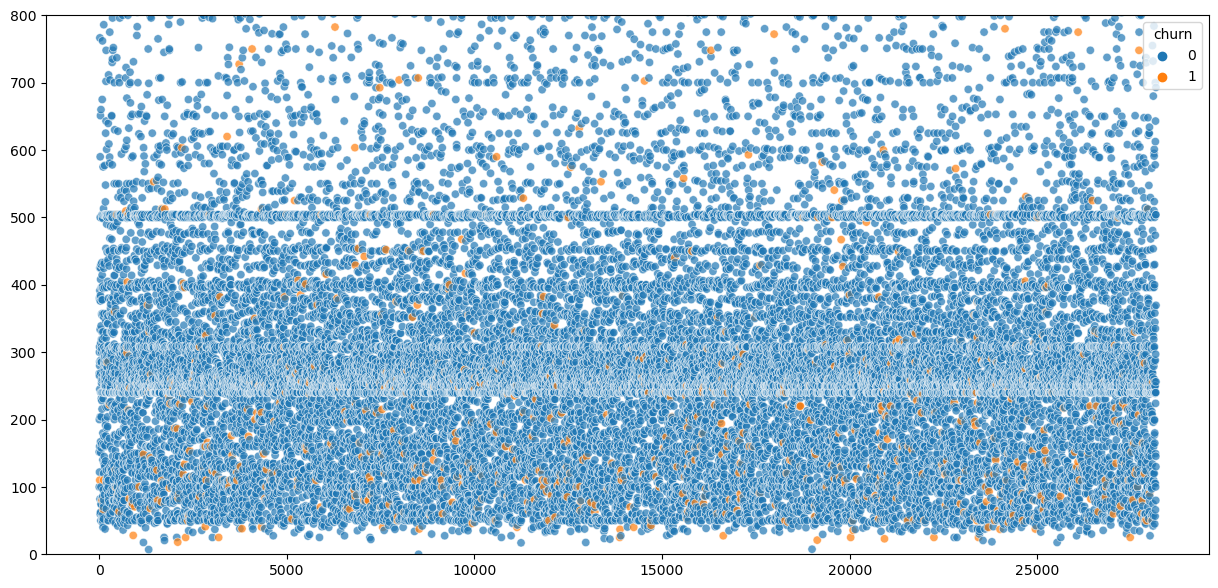

In [57]:
# Check the effect of max recharge amount on churn

plt.figure(figsize=(15,7))
sns.scatterplot(x=churn_telecom_data.index, y=churn_telecom_data['good_phase_max_rech_amt'] + churn_telecom_data['max_rech_amt_8'],
                hue=churn_telecom_data['churn'], alpha=0.7)
plt.ylim(0,800)
plt.show()

**Observation**

- Users who did max recharge of less than 200, churned more

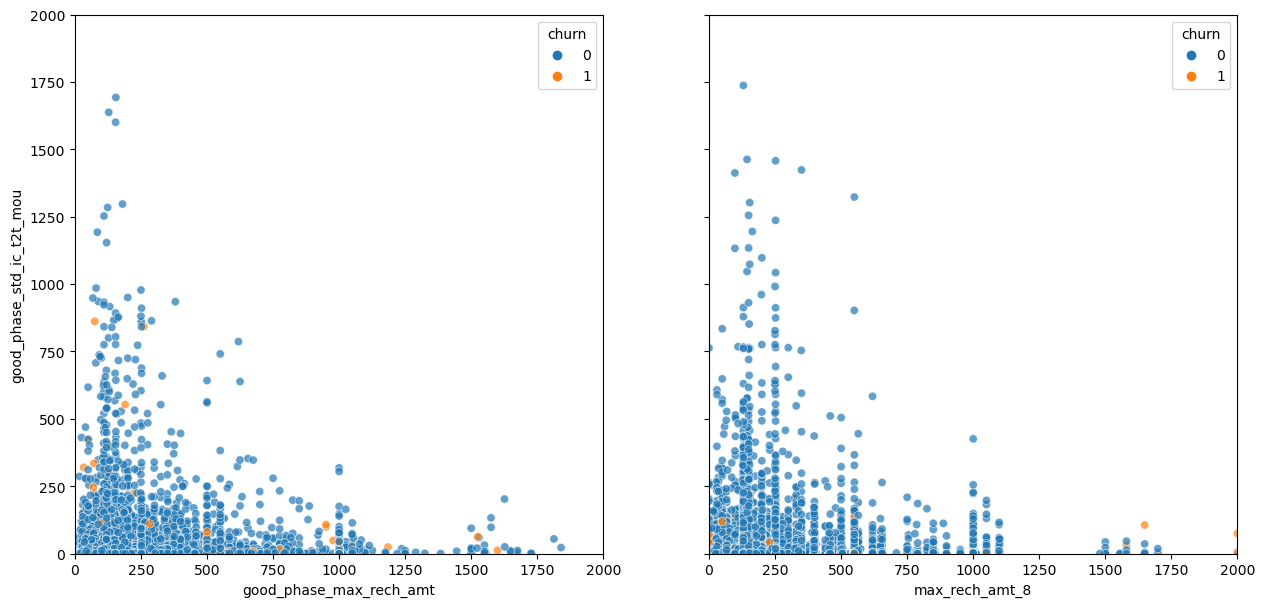

In [58]:
# Incoming from the same service provider vs the recharge amount

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='good_phase_max_rech_amt', y='good_phase_std_ic_t2t_mou', data=churn_telecom_data, ax=axes[0], hue='churn', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='std_ic_t2t_mou_8', data=churn_telecom_data, ax=axes[1], hue='churn', alpha=0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,2000)
axes[1].set_xlim(0,2000)
plt.ylim(0,2000)

plt.show()

**Observation**

- Users whose max recharge amount was higher and incoming call mou
was lower during the good phase, churned out more

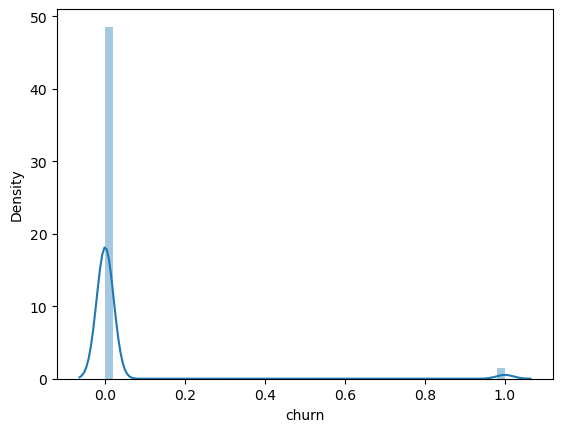

In [59]:
# Distribution of target variable

sns.distplot(churn_telecom_data['churn'])
plt.show()

**Observation**

- Though the target variable is not skewed, it is highliy imbalanced.
The number of non-churners in the dataset is around 94%
- This imbalance will be handled using SMOTE algorithm

### Data Preparation

In [60]:
# Cap the features with high outliers

columns_upper_limit = [('arpu_8', 7000), ('loc_og_mou_8', 4000), ('max_rech_amt_8', 1000 ), ('last_day_rch_amt_8', 1000 ),
               ('aon', 3000), ('total_mou_8', 4000), ('good_phase_loc_ic_mou', 3000), ('good_phase_last_day_rch_amt', 1000 ),
               ('good_phase_std_og_mou', 4000), ('good_phase_max_rech_amt', 1500), ('good_phase_loc_og_mou', 3000), ('good_phase_arpu', 7000)]

for i, value in columns_upper_limit:
    churn_telecom_data[i] = churn_telecom_data[i].apply(lambda x : x if x < value else value)

churn_telecom_data[columns_boxplot].head()

arpu_8  loc_og_mou_8  max_rech_amt_8  last_day_rch_amt_8   aon  \
0  3171.480        255.79            1000                 779   802   
1   137.362         63.04              30                  10   315   
2   637.760        129.74              50                  50   720   
3   366.966        182.14             179                   0   604   
4   409.230          0.00             455                 455  1328   

   total_mou_8  good_phase_loc_ic_mou  good_phase_last_day_rch_amt  \
0       378.20                391.555                          0.0   
1       171.56                 52.630                         25.0   
2      1068.53                106.505                         25.0   
3       239.47                145.520                         89.5   
4         0.00                  2.180                        126.0   

   good_phase_std_og_mou  good_phase_max_rech_amt  good_phase_loc_og_mou  \
0                 68.000                   1185.0                478.035   
1                136.870                    122.0                333.135   
2                848.990                     50.0                 95.565   
3                  4.355                     89.5                132.795   
4                  0.000                    753.5                  0.000   

   good_phase_arpu  
0        1209.5150  
1         435.4720  
2         556.1030  
3         134.1235  
4        1669.9265

In [61]:
X = churn_telecom_data.drop('churn', axis=1)
y = churn_telecom_data['churn']

### Standardization

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

### Handling Class Imbalance

In [63]:
churn_telecom_data.churn.value_counts()

0    27368
1      795
Name: churn, dtype: int64

In [64]:
# Use SMOTE to take care of class imbalance
!pip install imbalanced-learn

In [65]:
!pip uninstall scikit-learn --yes

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2


You can safely remove it manually.


In [66]:
!pip uninstall imblearn --yes

Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0


In [67]:
!pip install scikit-learn==1.2.2

  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)


In [68]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [69]:
from imblearn import over_sampling

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
sm = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(X, y)

In [72]:
y_res.value_counts()

1    27368
0    27368
Name: churn, dtype: int64

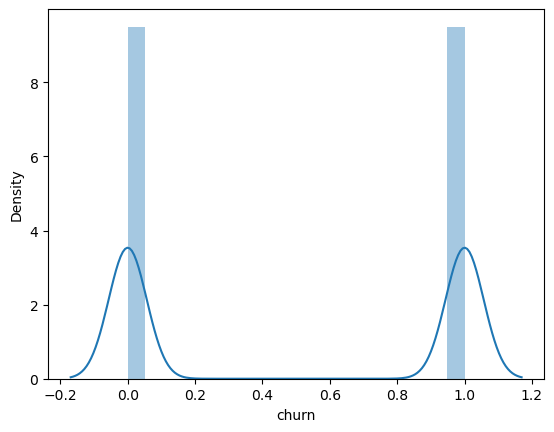

In [73]:
sns.distplot(y_res)
plt.show()

Now the class is balanced and target variable is not skewed

### PCA

In [74]:
X.shape

(28163, 55)

In [75]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
X_pca = pca.fit_transform(X_res)
X_pca.shape

(54736, 25)

### Model Building

### 1. Logistic Regression

For logistic regression we will be using the unaltered X and y so that we can use RFE for feature selection instead of PCA, to find out the strong predictor of churn

In [76]:
# Splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.7, test_size=0.3, random_state=25)

In [77]:
import statsmodels.api as sm

In [78]:
# Initial logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38315
Model:                            GLM   Df Residuals:                    38259
Model Family:                Binomial   Df Model:                           55
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17922.
Date:                Sun, 05 May 2024   Deviance:                       35845.
Time:                        19:43:25   Pearson chi2:                 7.69e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3629
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.3636      0.022    -63.004      0.000      -1.406      -1.321
arpu_8                          0.4504      0.048      9.424      0.000       0.357       0.544
roam_ic_mou_8                  -0.4452      0.036    -12.378      0.000      -0.516      -0.375
roam_og_mou_8                   0.0057      0.032      0.177      0.859      -0.057       0.069
loc_og_t2c_mou_8                0.0747      0.022      3.354      0.001       0.031       0.118
loc_og_mou_8                   -0.4001      0.084     -4.737      0.000      -0.566      -0.235
std_og_t2f_mou_8               -0.1163      0.039     -2.968      0.003      -0.193      -0.040
std_og_mou_8                   -0.0693      0.114     -0.606      0.545      -0.294       0.155
isd_og_mou_8                   -0.1779      0.063     -2.816      0.005      -0.302      -0.054
spl_og_mou_8                   -0.1234      0.032     -3.889      0.000      -0.186      -0.061
og_others_8                     0.1005      0.025      3.984      0.000       0.051       0.150
loc_ic_mou_8                   -1.5884      0.056    -28.123      0.000      -1.699      -1.478
std_ic_t2t_mou_8               -0.5684      0.063     -9.003      0.000      -0.692      -0.445
std_ic_t2f_mou_8               -0.0960      0.049     -1.963      0.050      -0.192      -0.000
std_ic_mou_8                   -0.1627      0.045     -3.585      0.000      -0.252      -0.074
spl_ic_mou_8                   -0.2792      0.023    -12.303      0.000      -0.324      -0.235
isd_ic_mou_8                   -0.1126      0.026     -4.283      0.000      -0.164      -0.061
ic_others_8                     0.1983      0.031      6.351      0.000       0.137       0.259
total_rech_num_8               -0.4400      0.033    -13.302      0.000      -0.505      -0.375
max_rech_amt_8                  0.1847      0.024      7.767      0.000       0.138       0.231
last_day_rch_amt_8             -0.6290      0.022    -28.319      0.000      -0.672      -0.585
vol_2g_mb_8                    -0.2795      0.030     -9.441      0.000      -0.338      -0.221
monthly_2g_8                   -0.6206      0.028    -22.184      0.000      -0.675      -0.566
sachet_2g_8                    -0.6129      0.030    -20.419      0.000      -0.672      -0.554
monthly_3g_8                   -0.8174      0.036    -22.752      0.000      -0.888      -0.747
sachet_3g_8                    -0.5160      0.039    -13.202      0.000      -0.593      -0.439
aon                            -0.3839      0.016    -23.830      0.000      -0.415      -0.352
total_mou_8                    -0.7182      0.128     -5.612      0.000      -0.969      -0.467
good_phase_monthly_3g           0.2219      0.027      8.308      0.000       0.170       0.274
good_phase_

### RFE for Feature Selection

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Create LR object
logreg = LogisticRegression(solver='liblinear')

# Run RFE for 25 features
rfe = RFE(logreg, n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [80]:
rfe_col = X.columns[rfe.support_]
rfe_col

Index(['arpu_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'aon', 'total_mou_8',
       'good_phase_monthly_3g', 'good_phase_loc_ic_mou',
       'good_phase_total_rech_num', 'good_phase_std_ic_t2t_mou',
       'good_phase_loc_og_mou', 'good_phase_roam_og_mou',
       'good_phase_sachet_3g', 'good_phase_vol_2g_mb', 'good_phase_total_mou',
       'good_phase_std_og_mou'],
      dtype='object')

In [81]:
# Build model with RFE selected features
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38315
Model:                            GLM   Df Residuals:                    38289
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18208.
Date:                Sun, 05 May 2024   Deviance:                       36416.
Time:                        19:44:00   Pearson chi2:                 6.86e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3533
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.2842      0.021    -62.336      0.000      -1.325      -1.244
arpu_8                        0.5387      0.030     17.864      0.000       0.480       0.598
roam_ic_mou_8                -0.3657      0.026    -14.022      0.000      -0.417      -0.315
loc_og_mou_8                 -0.3439      0.046     -7.494      0.000      -0.434      -0.254
loc_ic_mou_8                 -1.5815      0.055    -28.714      0.000      -1.689      -1.474
std_ic_t2t_mou_8             -0.6309      0.055    -11.399      0.000      -0.739      -0.522
spl_ic_mou_8                 -0.2814      0.022    -12.582      0.000      -0.325      -0.238
total_rech_num_8             -0.5617      0.031    -17.945      0.000      -0.623      -0.500
last_day_rch_amt_8           -0.5714      0.021    -26.746      0.000      -0.613      -0.530
vol_2g_mb_8                  -0.2470      0.029     -8.497      0.000      -0.304      -0.190
monthly_2g_8                 -0.6909      0.025    -27.935      0.000      -0.739      -0.642
sachet_2g_8                  -0.4578      0.023    -20.205      0.000      -0.502      -0.413
monthly_3g_8                 -0.8216      0.033    -24.870      0.000      -0.886      -0.757
sachet_3g_8                  -0.5513      0.039    -14.130      0.000      -0.628      -0.475
aon                          -0.3776      0.016    -24.103      0.000      -0.408      -0.347
total_mou_8                  -0.7848      0.036    -21.898      0.000      -0.855      -0.715
good_phase_monthly_3g         0.2695      0.022     12.095      0.000       0.226       0.313
good_phase_loc_ic_mou         0.7853      0.039     20.177      0.000       0.709       0.862
good_phase_total_rech_num     0.2835      0.023     12.190      0.000       0.238       0.329
good_phase_std_ic_t2t_mou     0.2277      0.027      8.469      0.000       0.175       0.280
good_phase_loc_og_mou         0.7995      0.107      7.490      0.000       0.590       1.009
good_phase_roam_og_mou        0.3440      0.032     10.782      0.000       0.281       0.407
good_phase_sachet_3g          0.2313      0.023     10.274      0.000       0.187       0.275
good_phase_vol_2g_mb          0.2326      0.020     11.746      0.000       0.194       0.271
good_phase_total_mou         -0.8599      0.190     -4.519      0.000      -1.233      -0.487
good_phase_std_og_mou         0.9894      0.168      5.899      0.000       0.661       1.318
=============================================================================================
"""

In [82]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      1    0.789785          1
1      0    0.024391          0
2      0    0.338433          0
3      0    0.704936          1
4      1    0.772155          1

In [83]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14644  4466]
 [ 3496 15709]]

Accuracy : 0.7921962677802428


In [84]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
23       good_phase_total_mou  90.39
24      good_phase_std_og_mou  80.17
19      good_phase_loc_og_mou  24.78
14                total_mou_8   4.46
2                loc_og_mou_8   4.32
3                loc_ic_mou_8   3.65
0                      arpu_8   3.51
16      good_phase_loc_ic_mou   3.36
6            total_rech_num_8   3.16
20     good_phase_roam_og_mou   3.10
17  good_phase_total_rech_num   2.40
11               monthly_3g_8   1.91
8                 vol_2g_mb_8   1.83
4            std_ic_t2t_mou_8   1.80
15      good_phase_monthly_3g   1.79
18  good_phase_std_ic_t2t_mou   1.78
12                sachet_3g_8   1.65
21       good_phase_sachet_3g   1.61
22       good_phase_vol_2g_mb   1.61
7          last_day_rch_amt_8   1.50
10                sachet_2g_8   1.40
9                monthly_2g_8   1.26
13                        aon   1.21
1               roam_ic_mou_8   1.13
5                spl_ic_mou_8   1.03

Since VIF for total_mou_8 is high, we will drop it

In [85]:
rfe_col = rfe_col.drop('total_mou_8', 1)

In [86]:
# Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38315
Model:                            GLM   Df Residuals:                    38290
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18477.
Date:                Sun, 05 May 2024   Deviance:                       36954.
Time:                        19:44:03   Pearson chi2:                 4.56e+06
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3441
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.2689      0.021    -61.557      0.000      -1.309      -1.229
arpu_8                        0.2444      0.024     10.014      0.000       0.197       0.292
roam_ic_mou_8                -0.3254      0.025    -13.126      0.000      -0.374      -0.277
loc_og_mou_8                 -0.5874      0.044    -13.397      0.000      -0.673      -0.501
loc_ic_mou_8                 -1.6340      0.056    -29.410      0.000      -1.743      -1.525
std_ic_t2t_mou_8             -0.7250      0.057    -12.799      0.000      -0.836      -0.614
spl_ic_mou_8                 -0.2822      0.022    -12.683      0.000      -0.326      -0.239
total_rech_num_8             -0.8150      0.030    -27.318      0.000      -0.873      -0.757
last_day_rch_amt_8           -0.5717      0.022    -26.504      0.000      -0.614      -0.529
vol_2g_mb_8                  -0.2331      0.029     -8.045      0.000      -0.290      -0.176
monthly_2g_8                 -0.6577      0.025    -26.548      0.000      -0.706      -0.609
sachet_2g_8                  -0.4205      0.023    -18.450      0.000      -0.465      -0.376
monthly_3g_8                 -0.7379      0.033    -22.574      0.000      -0.802      -0.674
sachet_3g_8                  -0.4935      0.039    -12.658      0.000      -0.570      -0.417
aon                          -0.3594      0.016    -23.069      0.000      -0.390      -0.329
good_phase_monthly_3g         0.2804      0.022     12.598      0.000       0.237       0.324
good_phase_loc_ic_mou         0.8541      0.039     21.678      0.000       0.777       0.931
good_phase_total_rech_num     0.4514      0.022     20.198      0.000       0.408       0.495
good_phase_std_ic_t2t_mou     0.2665      0.028      9.543      0.000       0.212       0.321
good_phase_loc_og_mou         0.5288      0.099      5.364      0.000       0.336       0.722
good_phase_roam_og_mou        0.2344      0.029      7.965      0.000       0.177       0.292
good_phase_sachet_3g          0.1983      0.022      8.885      0.000       0.155       0.242
good_phase_vol_2g_mb          0.2164      0.020     10.949      0.000       0.178       0.255
good_phase_total_mou         -0.4069      0.175     -2.327      0.020      -0.750      -0.064
good_phase_std_og_mou         0.2785      0.152      1.827      0.068      -0.020       0.577
=============================================================================================
"""

In [87]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      1    0.775310          1
1      0    0.047183          0
2      0    0.497103          0
3      0    0.652901          1
4      1    0.797219          1

In [88]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14411  4699]
 [ 3433 15772]]

Accuracy : 0.7877593631736918


In [89]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
22       good_phase_total_mou  90.35
23      good_phase_std_og_mou  78.88
18      good_phase_loc_og_mou  24.76
2                loc_og_mou_8   3.81
3                loc_ic_mou_8   3.65
15      good_phase_loc_ic_mou   3.35
19     good_phase_roam_og_mou   3.08
0                      arpu_8   2.86
6            total_rech_num_8   2.71
16  good_phase_total_rech_num   2.19
11               monthly_3g_8   1.88
8                 vol_2g_mb_8   1.83
14      good_phase_monthly_3g   1.79
4            std_ic_t2t_mou_8   1.79
17  good_phase_std_ic_t2t_mou   1.78
12                sachet_3g_8   1.63
21       good_phase_vol_2g_mb   1.61
20       good_phase_sachet_3g   1.60
7          last_day_rch_amt_8   1.50
10                sachet_2g_8   1.39
9                monthly_2g_8   1.26
13                        aon   1.21
1               roam_ic_mou_8   1.13
5                spl_ic_mou_8   1.03

In [90]:
# Drop 'gd_ph_total_mou'
rfe_col = rfe_col.drop('good_phase_total_mou', 1)

In [91]:
# Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38315
Model:                            GLM   Df Residuals:                    38291
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18480.
Date:                Sun, 05 May 2024   Deviance:                       36960.
Time:                        19:44:04   Pearson chi2:                 5.02e+06
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3440
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.2670      0.021    -61.550      0.000      -1.307      -1.227
arpu_8                        0.2299      0.024      9.731      0.000       0.184       0.276
roam_ic_mou_8                -0.3238      0.025    -13.062      0.000      -0.372      -0.275
loc_og_mou_8                 -0.5828      0.044    -13.340      0.000      -0.668      -0.497
loc_ic_mou_8                 -1.6301      0.055    -29.382      0.000      -1.739      -1.521
std_ic_t2t_mou_8             -0.7235      0.057    -12.779      0.000      -0.834      -0.612
spl_ic_mou_8                 -0.2826      0.022    -12.699      0.000      -0.326      -0.239
total_rech_num_8             -0.8067      0.030    -27.277      0.000      -0.865      -0.749
last_day_rch_amt_8           -0.5699      0.022    -26.433      0.000      -0.612      -0.528
vol_2g_mb_8                  -0.2323      0.029     -8.026      0.000      -0.289      -0.176
monthly_2g_8                 -0.6574      0.025    -26.533      0.000      -0.706      -0.609
sachet_2g_8                  -0.4223      0.023    -18.540      0.000      -0.467      -0.378
monthly_3g_8                 -0.7344      0.033    -22.499      0.000      -0.798      -0.670
sachet_3g_8                  -0.4929      0.039    -12.659      0.000      -0.569      -0.417
aon                          -0.3589      0.016    -23.042      0.000      -0.389      -0.328
good_phase_monthly_3g         0.2793      0.022     12.557      0.000       0.236       0.323
good_phase_loc_ic_mou         0.8516      0.039     21.616      0.000       0.774       0.929
good_phase_total_rech_num     0.4462      0.022     20.090      0.000       0.403       0.490
good_phase_std_ic_t2t_mou     0.2660      0.028      9.531      0.000       0.211       0.321
good_phase_loc_og_mou         0.3119      0.032      9.737      0.000       0.249       0.375
good_phase_roam_og_mou        0.1770      0.016     11.105      0.000       0.146       0.208
good_phase_sachet_3g          0.1977      0.022      8.870      0.000       0.154       0.241
good_phase_vol_2g_mb          0.2151      0.020     10.890      0.000       0.176       0.254
good_phase_std_og_mou        -0.0747      0.015     -5.017      0.000      -0.104      -0.045
=============================================================================================
"""

In [92]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      1    0.775663          1
1      0    0.047182          0
2      0    0.497366          0
3      0    0.651774          1
4      1    0.796369          1

In [93]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14422  4688]
 [ 3440 15765]]

Accuracy : 0.78786376092914


In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                loc_og_mou_8  3.81
3                loc_ic_mou_8  3.65
15      good_phase_loc_ic_mou  3.35
18      good_phase_loc_og_mou  3.34
0                      arpu_8  2.75
6            total_rech_num_8  2.69
16  good_phase_total_rech_num  2.18
11               monthly_3g_8  1.87
8                 vol_2g_mb_8  1.83
14      good_phase_monthly_3g  1.79
4            std_ic_t2t_mou_8  1.79
17  good_phase_std_ic_t2t_mou  1.78
12                sachet_3g_8  1.63
20       good_phase_sachet_3g  1.60
21       good_phase_vol_2g_mb  1.60
22      good_phase_std_og_mou  1.58
7          last_day_rch_amt_8  1.50
10                sachet_2g_8  1.39
9                monthly_2g_8  1.26
13                        aon  1.21
19     good_phase_roam_og_mou  1.15
1               roam_ic_mou_8  1.13
5                spl_ic_mou_8  1.03

In [95]:
# Drop 'loc_ic_mou_8'
rfe_col = rfe_col.drop('loc_ic_mou_8', 1)

In [96]:
# Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38315
Model:                            GLM   Df Residuals:                    38292
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19038.
Date:                Sun, 05 May 2024   Deviance:                       38075.
Time:                        19:44:06   Pearson chi2:                 1.44e+07
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3247
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.1462      0.019    -59.047      0.000      -1.184      -1.108
arpu_8                        0.1990      0.024      8.392      0.000       0.153       0.245
roam_ic_mou_8                -0.2627      0.024    -10.883      0.000      -0.310      -0.215
loc_og_mou_8                 -1.2345      0.044    -28.165      0.000      -1.320      -1.149
std_ic_t2t_mou_8             -0.8297      0.057    -14.487      0.000      -0.942      -0.717
spl_ic_mou_8                 -0.2997      0.022    -13.335      0.000      -0.344      -0.256
total_rech_num_8             -0.9280      0.030    -31.160      0.000      -0.986      -0.870
last_day_rch_amt_8           -0.5831      0.022    -26.447      0.000      -0.626      -0.540
vol_2g_mb_8                  -0.2677      0.029     -9.162      0.000      -0.325      -0.210
monthly_2g_8                 -0.6726      0.024    -27.480      0.000      -0.721      -0.625
sachet_2g_8                  -0.4278      0.023    -18.828      0.000      -0.472      -0.383
monthly_3g_8                 -0.7332      0.032    -22.840      0.000      -0.796      -0.670
sachet_3g_8                  -0.5146      0.039    -13.199      0.000      -0.591      -0.438
aon                          -0.3652      0.015    -24.032      0.000      -0.395      -0.335
good_phase_monthly_3g         0.2720      0.022     12.487      0.000       0.229       0.315
good_phase_loc_ic_mou        -0.1175      0.019     -6.137      0.000      -0.155      -0.080
good_phase_total_rech_num     0.5112      0.022     23.028      0.000       0.468       0.555
good_phase_std_ic_t2t_mou     0.3045      0.028     11.016      0.000       0.250       0.359
good_phase_loc_og_mou         0.6459      0.032     20.333      0.000       0.584       0.708
good_phase_roam_og_mou        0.1617      0.016     10.021      0.000       0.130       0.193
good_phase_sachet_3g          0.2055      0.022      9.241      0.000       0.162       0.249
good_phase_vol_2g_mb          0.2259      0.019     11.597      0.000       0.188       0.264
good_phase_std_og_mou        -0.0455      0.015     -3.099      0.002      -0.074      -0.017
=============================================================================================
"""

In [97]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      1    0.721100          1
1      0    0.037550          0
2      0    0.442323          0
3      0    0.683639          1
4      1    0.726717          1

In [98]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14239  4871]
 [ 3498 15707]]

Accuracy : 0.7815737961633825


In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                loc_og_mou_8  3.23
17      good_phase_loc_og_mou  3.07
0                      arpu_8  2.74
5            total_rech_num_8  2.65
15  good_phase_total_rech_num  2.16
10               monthly_3g_8  1.87
7                 vol_2g_mb_8  1.83
3            std_ic_t2t_mou_8  1.79
13      good_phase_monthly_3g  1.79
16  good_phase_std_ic_t2t_mou  1.77
11                sachet_3g_8  1.63
19       good_phase_sachet_3g  1.60
20       good_phase_vol_2g_mb  1.60
21      good_phase_std_og_mou  1.57
14      good_phase_loc_ic_mou  1.50
6          last_day_rch_amt_8  1.50
9                 sachet_2g_8  1.39
8                monthly_2g_8  1.25
12                        aon  1.21
18     good_phase_roam_og_mou  1.15
1               roam_ic_mou_8  1.13
4                spl_ic_mou_8  1.03

VIF values looks okay now, we can proceed further

In [100]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [101]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8178599323092944

In [102]:
# Let us calculate specificity
TN / float(TN+FP)

0.7451072736787022

In [103]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2548927263212977


In [104]:
# positive predictive value
print (TP / float(TP+FP))

0.7632908931868986


In [105]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8027851384112308


### Plotting ROC

In [106]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

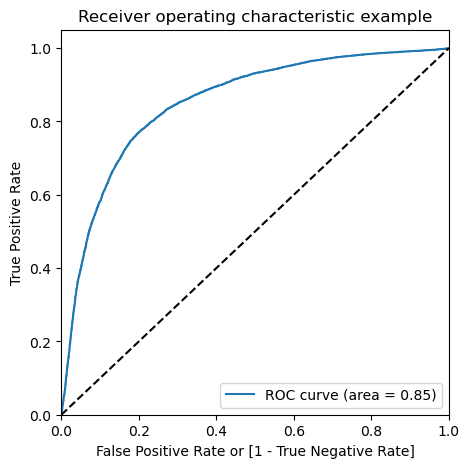

In [107]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Optimal Cutoff Point

In [108]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      1    0.721100          1    1    1    1    1    1    1    1    1    0   
1      0    0.037550          0    1    0    0    0    0    0    0    0    0   
2      0    0.442323          0    1    1    1    1    1    0    0    0    0   
3      0    0.683639          1    1    1    1    1    1    1    1    0    0   
4      1    0.726717          1    1    1    1    1    1    1    1    1    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [109]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5, 0.5, 0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.501240  1.000000  0.000000
0.1   0.1  0.609161  0.980890  0.235583
0.2   0.2  0.677437  0.954647  0.398849
0.3   0.3  0.727757  0.921739  0.532810
0.4   0.4  0.761060  0.876230  0.645317
0.5   0.5  0.781574  0.817860  0.745107
0.6   0.6  0.779094  0.720542  0.837938
0.7   0.7  0.737831  0.572195  0.904291
0.8   0.8  0.661569  0.367925  0.956672
0.9   0.9  0.534908  0.082583  0.989482


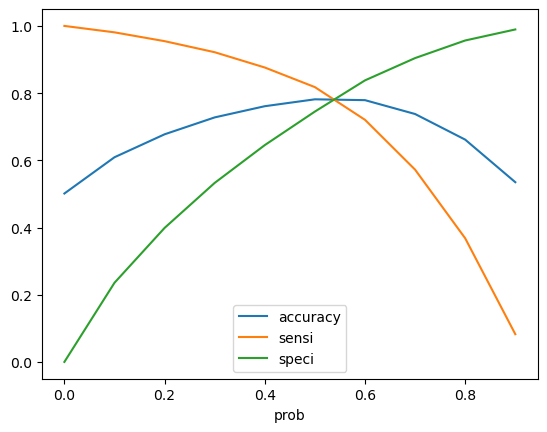

In [110]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

0.5 is the optimal point for our model

In [111]:
X_test = X_test[rfe_col]
X_test_sm = sm.add_constant(X_test)

# Predict on test data

y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

Churn  Churn_Prob  predicted
44484      1    0.833446          1
44515      1    0.603128          1
41746      1    0.936635          1
32056      1    0.852592          1
49738      1    0.479988          0

In [112]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)}')

[[6185 2073]
 [1528 6635]]

Accuracy : 0.7807076304731746


In [113]:
# Top 10 predictors

abs(res.params).sort_values(ascending=False)[0:11]

loc_og_mou_8                 1.234520
const                        1.146243
total_rech_num_8             0.927984
std_ic_t2t_mou_8             0.829736
monthly_3g_8                 0.733162
monthly_2g_8                 0.672624
good_phase_loc_og_mou        0.645922
last_day_rch_amt_8           0.583055
sachet_3g_8                  0.514585
good_phase_total_rech_num    0.511245
sachet_2g_8                  0.427843
dtype: float64

- Using Log Reg, we are getting acuuracy of 78.15% on train data and 78.07% on test data
- It can be seen that most of the critical features are from action phase which is inline with business understanding that action phase needs more attention

### 2. Decision Tree

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, train_size=0.7, random_state=25)

In [115]:
from sklearn.tree import DecisionTreeClassifier

# Initial classifier
intial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
intial_dt.fit(X_train, y_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = intial_dt.predict(X_test)

# Print the report on test data
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.8809343599112619
              precision    recall  f1-score   support

           0       0.89      0.78      0.84      8258
           1       0.81      0.91      0.85      8163

    accuracy                           0.85     16421
   macro avg       0.85      0.85      0.84     16421
weighted avg       0.85      0.85      0.84     16421



### Hyperparameter Tuning

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
dt = DecisionTreeClassifier(random_state=42)

In [118]:
# Define parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

In [119]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [120]:
# Perform gridsearch
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [121]:
grid_search.best_score_

0.8878506326406443

In [122]:
# Best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=30, random_state=42)

In [123]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90      8258
           1       0.87      0.93      0.90      8163

    accuracy                           0.90     16421
   macro avg       0.90      0.90      0.90     16421
weighted avg       0.90      0.90      0.90     16421



We are getting an accuracy of 90% on test data, with decission tree

### 3. Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = rf.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.8809343599112619
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      8258
           1       0.86      0.93      0.90      8163

    accuracy                           0.89     16421
   macro avg       0.89      0.89      0.89     16421
weighted avg       0.89      0.89      0.89     16421



### Hyperparameter Tuning

In [125]:
rf = RandomForestClassifier(random_state=25, n_jobs=-1)

In [126]:
# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

In [127]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [128]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [129]:
grid_search.best_score_

0.9438861640964759

In [130]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [131]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

#Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      8258
           1       0.94      0.97      0.95      8163

    accuracy                           0.95     16421
   macro avg       0.95      0.95      0.95     16421
weighted avg       0.95      0.95      0.95     16421



We are getting an accuracy of 95% on test data with Random Forest

### Conclusions

- Given our business problem, to retain the customers, we need higher recall. Since giving an offer to a customer who is not going to churn will cost less as compared to losing and to get a new customer, we need to have high rate of correctly identifying the true positives, hence recall.
- When we compare the trained models, we can see that tuned random forest is performing the best which is highest accuracy as well as highest recall i.e., 95%. So we will go with random forest.

In [132]:
final_model = RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [133]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)



# Print the report
print("Report on train data")
print(metrics.classification_report(y_train, y_train_pred))

print("Report on test data")
print(metrics.classification_report(y_test, y_test_pred))

Report on train data
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19110
           1       0.98      1.00      0.99     19205

    accuracy                           0.99     38315
   macro avg       0.99      0.99      0.99     38315
weighted avg       0.99      0.99      0.99     38315

Report on test data
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      8258
           1       0.94      0.97      0.95      8163

    accuracy                           0.95     16421
   macro avg       0.95      0.95      0.95     16421
weighted avg       0.95      0.95      0.95     16421



### Strategies to manage customer churn

The top 10 predictors are:
    
| Feature | 
| --- | 
| loc_og_mou_8 |
| total_rech_num_8 |
| monthly_3g_8 |
| monthly_2g_8 |
| good_phase_loc_og_mou |
| good_phase_total_rech_num |
| last_day_rch_amt_8 |
| std_ic_t2t_mou_8 |
| sachet_2g_8 |
| aon |

- We can see most of the top predictors are from action phase as drop in engagement in prominent in that phase

Some of the factors we noticed while performing EDA which can be clubed with these insights are:

- Users whose maximum recharge amount is less than 200 even in the good pahse, should have a tag and re-evaluated time to time as they are more likely to churn
- Users that have been with the network for less than 4 years, should be monitored time to time, as from data we can see that users who have been associated with the network for less than 4 years tend to churn more
- MOU is one of the major factors, but data especially VBC if the user is not using a data pack if another factor to look out